[[132   6]
 [  3  69]]
              precision    recall  f1-score   support

       False       0.98      0.96      0.97       138
        True       0.92      0.96      0.94        72

    accuracy                           0.96       210
   macro avg       0.95      0.96      0.95       210
weighted avg       0.96      0.96      0.96       210

0.9571428571428572


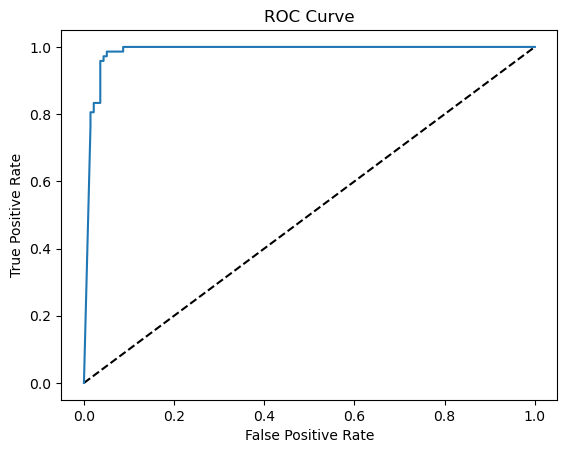

0.9862117552334944


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB


df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Desktop\jupiter_demo\ML\Cases-20240426T111123Z-001\Cases\Wisconsin\BreastCancer.csv")
dum_df = pd.get_dummies(df, drop_first=True)

X = dum_df.iloc[:,1:-1]
y = dum_df.iloc[:,-1]


# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state=2021,
                                                    stratify=y)

gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)
y_pred_prob = gaussian.predict_proba(X_test)
############## Model Evaluation ##############
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

##############################################

# ROC
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities: y_pred_prob
y_probs = gaussian.predict_proba(X_test)
y_pred_prob = y_probs[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

print(roc_auc_score(y_test, y_pred_prob))

